# PROYECTO PRÁCTICO: Machine Learning Explicable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [3]:
# Establecemos una semilla
semilla = 123
np.random.seed(semilla)

## Preprocesamiento

In [4]:
data = pd.read_csv('data.csv', header=0, sep=";")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Limpiar los nombres de las columnas
data.columns = data.columns.str.strip()  # Eliminar espacios al principio y al final
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Vamos a examinar el dataset, empezando por examinar los valores faltantes.

In [6]:
# Revisar si hay valores faltantes
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

No hay valores faltantes.

Ahora revisamos los tipos de datos del dataset.

In [7]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

Observamos que la columna `Target` es de tipo objeto. La transformamos asignando valores enteros a cada categoría.

In [8]:
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


Ahora analizamos algunos estadísticos asociados a los datos.

In [9]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


Mostramos un boxplot.

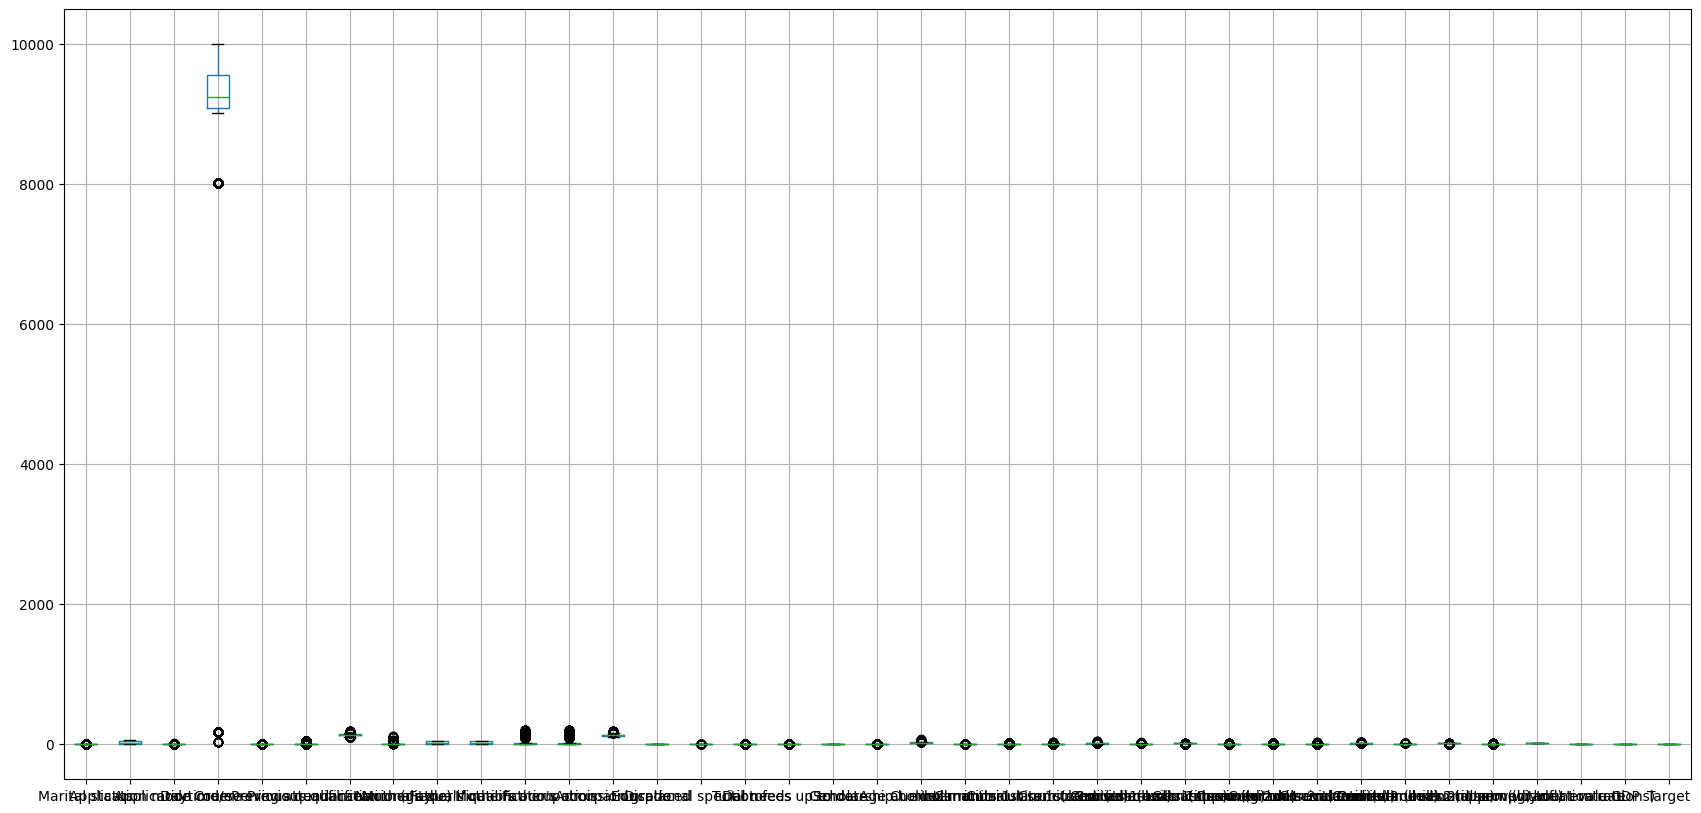

In [10]:
plt.figure(figsize=(21, 10))
data.boxplot()
plt.show()

Ahora separamos `X` e `y`.

In [11]:
X = data.drop(columns=['Target'])
y = data[['Target']]

Vemos si los datos están desbalanceados.

In [12]:
Counter(y['Target'])

Counter({0: 1421, 2: 2209, 1: 794})

Hacemos una selección de características.

In [13]:
# Selección de características para la etiqueta actual
selector = SelectKBest(f_classif, k='all')
selector.fit(X, y['Target'])

# Creamos un DataFrame con las puntuaciones promediadas
features_df = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_
}).sort_values(by="Score", ascending=False)

print(features_df)

# Filtramos por umbral
threshold = 5  # Puntuación mínima aceptable
selected_features = features_df[features_df["Score"] > threshold]["Feature"]

# Creamos nuevos conjuntos de datos con las características seleccionadas
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

                                           Feature        Score
30             Curricular units 2nd sem (approved)  1410.732938
31                Curricular units 2nd sem (grade)  1134.109544
24             Curricular units 1st sem (approved)   859.866768
25                Curricular units 1st sem (grade)   713.517328
16                         Tuition fees up to date   505.621429
18                              Scholarship holder   225.751437
19                               Age at enrollment   154.712071
15                                          Debtor   137.647527
17                                          Gender   123.041811
1                                 Application mode   114.534956
29          Curricular units 2nd sem (evaluations)    87.801092
28             Curricular units 2nd sem (enrolled)    75.591910
22             Curricular units 1st sem (enrolled)    59.467391
23          Curricular units 1st sem (evaluations)    37.527840
12                                 Admis

## Modelos

### Decision Tree

In [14]:
# Definimos los rangos de los parámetros
param_grid = {
    "max_depth": [2, 3, 5],
    "min_samples_split": [2, 3, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

# Definimos el modelo base
modelo = DecisionTreeClassifier(random_state = semilla)

# Configuramos GridSearchCV
grid_cv = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring='accuracy',  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1
)

# Realizamos la búsqueda
grid_cv.fit(X, y)

# Mejor modelo y parámetros
best_model = grid_cv.best_estimator_
print("Best parameters:", grid_cv.best_params_)
print("Best score:", grid_cv.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.744345680906


### XGBoost

In [15]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_dist = {
    "learning_rate": [0.01, 0.1, 0.3],  # Tasa de aprendizaje
    "n_estimators": [30, 50, 100],  # Número de estimadores (árboles)
    "max_depth": [2, 3],  # Profundidad máxima del árbol
    "subsample": [0.8, 1.0],  # Proporción de muestras para cada árbol
    "colsample_bytree": [0.8, 1.0],  # Proporción de columnas usadas por árbol
    "reg_alpha": [10, 15],  # Regularización L1 (Lasso)
    "reg_lambda": [10, 15],  # Regularización L2 (Ridge)
    "gamma": [0.1, 0.2, 0.3],  # Regularización para la reducción de la pérdida
}

# Definimos el modelo base: XGBClassifier
xgb_model = XGBClassifier()

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,  # Número de iteraciones aleatorias
    scoring='accuracy',  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla
)

# Realizamos la búsqueda
random_cv.fit(X, y)

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'subsample': 0.8, 'reg_lambda': 15, 'reg_alpha': 10, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best score: 0.7753109901066033


### SVM

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetro de penalización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipos de kernel
    'degree': [3, 4, 5],  # Solo para kernel polinómico
    'gamma': ['scale', 'auto'],  # Controla la influencia de un solo punto de entrenamiento en el modelo
    'coef0': [0, 0.5, 1],  # Solo para kernel 'poly' y 'sigmoid', controla la influencia del término independiente
    'shrinking': [True, False],  # Habilita o deshabilita la heurística de reducción (más rápida)
    'probability': [True, False],  # Habilita las probabilidades (requerido si se usan funciones de probabilidad como `predict_proba`)
    'tol': [1e-3, 1e-4],  # Tolerancia para los criterios de parada del algoritmo
}

# Definimos el modelo base: SVC
svc_model = SVC()

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=param_dist,
    n_iter=5,  # Número de iteraciones aleatorias
    scoring="accuracy",  # Métrica
    cv=2,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla  # Semilla para reproducibilidad
)

# Realizamos la búsqueda
random_cv.fit(X, y.values.ravel())

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
